In [1]:
from pybaseball import playerid_lookup, lahman, statcast_pitcher
import pandas as pd
pd.options.display.max_columns = 999
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns

In [2]:
id = playerid_lookup('lynn','lance')
id

Gathering player lookup table. This may take a moment.


,name_last,name_first,key_mlbam,key_retro,key_bbref,key_fangraphs,mlb_played_first,mlb_played_last
0,lynn,lance,458681,lynnl001,lynnla01,2520,2011.0,2019.0


In [3]:
p = lahman.pitching()

In [4]:
p[p["playerID"]==id["key_bbref"][0]]

,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,SHO,SV,IPouts,H,ER,HR,BB,SO,BAOpp,ERA,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP
40801,lynnla01,2011,1,SLN,NL,1,1,18,2,0,0,1,104,25,12,3,11,40,0.203,3.12,1.0,1.0,1.0,0,136.0,2.0,12,1.0,0.0,3.0
41528,lynnla01,2012,1,SLN,NL,18,7,35,29,0,0,0,528,168,74,16,64,180,0.253,3.78,3.0,3.0,10.0,0,744.0,2.0,76,4.0,3.0,16.0
42256,lynnla01,2013,1,SLN,NL,15,10,33,33,0,0,0,605,189,89,14,76,198,0.252,3.97,0.0,6.0,11.0,0,856.0,0.0,92,11.0,8.0,18.0
42987,lynnla01,2014,1,SLN,NL,15,10,33,33,2,1,0,611,185,62,13,72,181,0.238,2.74,1.0,7.0,7.0,0,866.0,0.0,72,6.0,4.0,12.0
43774,lynnla01,2015,1,SLN,NL,12,11,31,31,0,0,0,526,172,59,13,68,167,0.258,3.03,5.0,2.0,5.0,0,751.0,0.0,66,9.0,2.0,16.0


In [5]:
full_df=statcast_pitcher(start_dt="2011-01-01", end_dt="2019-06-06", player_id=458681)

Gathering Player Data


/Users/tburch/Documents/gitDevelopment/baseball-studies/venv_py3_baseball/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3296: DtypeWarning: Columns (87,88) have mixed types. Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [6]:
full_df.head()

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,spin_dir,spin_rate_deprecated,break_angle_deprecated,break_length_deprecated,zone,des,game_type,stand,p_throws,home_team,away_team,type,hit_location,bb_type,balls,strikes,game_year,pfx_x,pfx_z,plate_x,plate_z,on_3b,on_2b,on_1b,outs_when_up,inning,inning_topbot,hc_x,hc_y,tfs_deprecated,tfs_zulu_deprecated,fielder_2,umpire,sv_id,vx0,vy0,vz0,ax,ay,az,sz_top,sz_bot,hit_distance_sc,launch_speed,launch_angle,effective_speed,release_spin_rate,release_extension,game_pk,pitcher.1,fielder_2.1,fielder_3,fielder_4,fielder_5,fielder_6,fielder_7,fielder_8,fielder_9,release_pos_y,estimated_ba_using_speedangle,estimated_woba_using_speedangle,woba_value,woba_denom,babip_value,iso_value,launch_speed_angle,at_bat_number,pitch_number,pitch_name,home_score,away_score,bat_score,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment
0,FF,2015-10-10,94.6,-1.8323,5.9984,Lance Lynn,543294,458681,strikeout,swinging_strike,NaN,NaN,NaN,NaN,6.0,Kyle Hendricks strikes out swinging.,D,R,R,STL,CHC,S,2.0,NaN,1,2,2015,-0.903767,1.207633,0.527,2.171,NaN,516770.0,NaN,2,3,Top,NaN,NaN,NaN,NaN,425877.0,NaN,151010_173517,7.666,-137.411,-6.109,-10.739,27.747,-18.531,3.39,1.52,NaN,NaN,NaN,95.201,2550.0,6.251,446245,458681,425877.0,461235.0,543939.0,572761.0,425509.0,407812.0,518792.0,572039.0,54.2497,NaN,NaN,0.0,1.0,0.0,0.0,NaN,24,4,4-Seam Fastball,1,6,6,1,6,1,6,1,Standard,Strategic
1,FF,2015-10-10,95.1,-1.8238,5.9670,Lance Lynn,543294,458681,NaN,ball,NaN,NaN,NaN,NaN,12.0,NaN,D,R,R,STL,CHC,B,NaN,NaN,0,2,2015,-1.333792,1.342367,0.654,4.268,NaN,516770.0,NaN,2,3,Top,NaN,NaN,NaN,NaN,425877.0,NaN,151010_173458,9.108,-138.105,-1.109,-16.519,34.008,-16.882,3.64,1.66,NaN,NaN,NaN,94.243,2551.0,5.899,446245,458681,425877.0,461235.0,543939.0,572761.0,425509.0,407812.0,518792.0,572039.0,54.6023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24,3,4-Seam Fastball,1,6,6,1,6,1,6,1,Standard,Strategic
2,FT,2015-10-10,92.0,-1.7596,6.1144,Lance Lynn,543294,458681,NaN,foul,NaN,NaN,NaN,NaN,11.0,NaN,D,R,R,STL,CHC,S,NaN,NaN,0,1,2015,-1.207150,0.559767,-1.093,2.898,NaN,516770.0,NaN,2,3,Top,NaN,NaN,NaN,NaN,425877.0,NaN,151010_173429,3.905,-133.969,-2.601,-14.169,26.922,-27.501,3.39,1.52,NaN,NaN,NaN,92.404,2249.0,6.070,446245,458681,425877.0,461235.0,543939.0,572761.0,425509.0,407812.0,518792.0,572039.0,54.4306,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24,2,2-Seam Fastball,1,6,6,1,6,1,6,1,Standard,Standard
3,FF,2015-10-10,93.8,-1.8433,6.0165,Lance Lynn,543294,458681,NaN,foul,NaN,NaN,NaN,NaN,2.0,NaN,D,R,R,STL,CHC,S,NaN,NaN,0,0,2015,-1.169575,1.381067,0.068,2.815,NaN,516770.0,NaN,2,3,Top,NaN,NaN,NaN,NaN,425877.0,NaN,151010_173406,7.106,-136.308,-5.038,-14.085,29.188,-16.557,3.39,1.52,NaN,NaN,NaN,93.397,2430.0,5.819,446245,458681,425877.0,461235.0,543939.0,572761.0,425509.0,407812.0,518792.0,572039.0,54.6821,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24,1,4-Seam Fastball,1,6,6,1,6,1,6,1,Standard,Standard
4,FT,2015-10-10,94.1,-2.0088,5.9006,Lance Lynn,471083,458681,field_out,hit_into_play_score,NaN,NaN,NaN,NaN,7.0,"Miguel Montero grounds out, second baseman Kol...",D,L,R,STL,CHC,X,4.0,ground_ball,1,2,2015,-1.282300,0.341900,-0.420,1.815,519203.0,NaN,516770.0,1,3,Top,147.52,160.71,NaN,NaN,425877.0,NaN,151010_173314,6.570,-136.713,-4.883,-15.787,28.121,-30.221,3.34,1.44,NaN,82.9,-21.0,94.331,2297.0,6.115,446245,458681,425877.0,461235.0,543939.0,572761.0,425509.0,407812.0,518792.0,572039.0,54.3858,0.076,0.074,0.0,1.0,0.0,0.0,2.0,23,6,2-Seam Fastball,1,5,5,1,5,1,5,1,Standard,Strategic


In [7]:
full_df['year'] = full_df['game_date'].str[:4].astype(int)

In [8]:
for year in range(2011,2020):
    this_year_df = full_df[full_df["year"] == year]
    print(year)
    print(this_year_df["pitch_name"].value_counts(normalize=True))
    

#df_2019["pitch_name"].value_counts(normalize=True)

2011
4-Seam Fastball     0.383880
2-Seam Fastball     0.322404
Curveball           0.244536
Changeup            0.020492
Intentional Ball    0.013661
Slider              0.013661
Pitch Out           0.001366
Name: pitch_name, dtype: float64
2012
4-Seam Fastball     0.478611
2-Seam Fastball     0.220707
Curveball           0.177619
Changeup            0.067266
Slider              0.051147
Intentional Ball    0.003100
Pitch Out           0.001550
Name: pitch_name, dtype: float64
2013
4-Seam Fastball     0.514678
2-Seam Fastball     0.217284
Slider              0.121536
Curveball           0.106722
Changeup            0.037586
Intentional Ball    0.002195
Name: pitch_name, dtype: float64
2014
4-Seam Fastball     0.554493
2-Seam Fastball     0.246927
Slider              0.090139
Curveball           0.081945
Changeup            0.023764
Intentional Ball    0.002185
Fastball            0.000273
Pitch Out           0.000273
Name: pitch_name, dtype: float64
2015
4-Seam Fastball     0.562419
2-

In [9]:
piv_dict = {}
for year in range(2011,2020):
    this_year_df = full_df[full_df["year"] == year]
    piv_dict[year] = this_year_df["pitch_name"].value_counts(normalize=True)

In [10]:
new_df = pd.DataFrame(piv_dict).transpose()
new_df = new_df.drop(["Intentional Ball","Pitch Out","Fastball"], axis=1)

In [11]:
new_df.head()

,2-Seam Fastball,4-Seam Fastball,Changeup,Curveball,Cutter,Slider
2011,0.322404,0.383880,0.020492,0.244536,NaN,0.013661
2012,0.220707,0.478611,0.067266,0.177619,NaN,0.051147
2013,0.217284,0.514678,0.037586,0.106722,NaN,0.121536
2014,0.246927,0.554493,0.023764,0.081945,NaN,0.090139
2015,0.279584,0.562419,0.026008,0.046164,NaN,0.078674


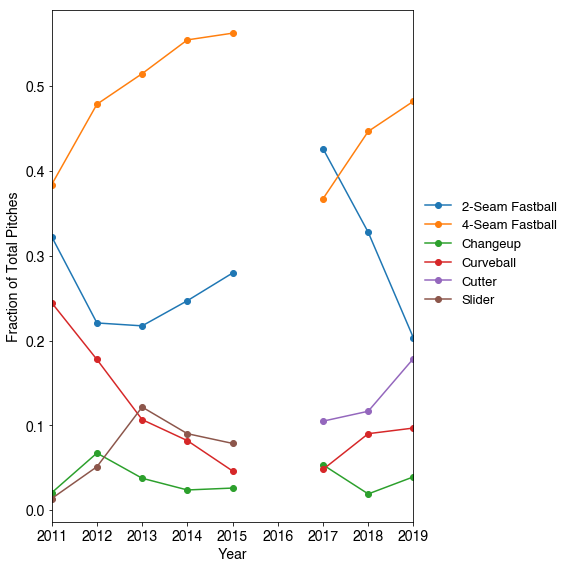

In [12]:
fig=plt.figure(figsize=(8,8))
new_df.plot(marker='o', ax=plt.gca())
plt.legend(frameon=False, bbox_to_anchor=(1, 0.65),fontsize=13)
plt.xlabel("Year",fontsize=14)
plt.ylabel("Fraction of Total Pitches", fontsize=14)
plt.gca().tick_params(axis='both', which='major', labelsize=14)
plt.tight_layout()
plt.savefig('../plots/lynn/lynn_line')

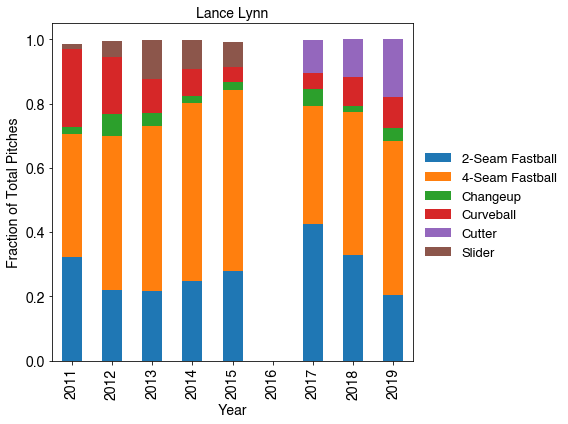

In [13]:
fig=plt.figure(figsize=(8,6))
new_df.plot(kind='bar',stacked=True, ax=plt.gca())
plt.legend(frameon=False, bbox_to_anchor=(1, 0.65),fontsize=13)
plt.title("Lance Lynn",fontsize=14)
plt.xlabel("Year",fontsize=14)
plt.ylabel("Fraction of Total Pitches", fontsize=14)
plt.gca().tick_params(axis='both', which='major', labelsize=14)
plt.tight_layout()
plt.savefig('../plots/lynn/lynn_stack')

In [14]:
from bs4 import BeautifulSoup
import requests

In [15]:
lynn_page = 'https://www.fangraphs.com/statss.aspx?playerid=2520&position=P'
page = requests.get(lynn_page)
soup = BeautifulSoup(page.text, 'html.parser')

In [16]:
#for row in soup.findAll('tr',{ 'class' : ['starter' , 'even']}):

found = soup.find('table',{'class':'rgMasterTable', 'id':'SeasonStats1_dgSeason11_ctl00'})


In [17]:
stats_df=pd.read_html(str(found))[0]
valid_teams = ['Cardinals','2 Teams','Rangers']
stats_df= stats_df[stats_df['Team'].isin(valid_teams)]
#gets rid of playoff stats?
season_rows = stats_df['Season'].loc[(stats_df['Season'].shift() != stats_df['Season'])]
stats_df = stats_df[stats_df.index.isin(season_rows.index)]
stats_df['Season']=stats_df['Season'].astype(int)
stats_df = stats_df.set_index('Season')

In [18]:
# Convert IP
extra_outs = stats_df['IP'].astype(str).str[-1]
total_outs = stats_df['IP'].apply(np.floor) * 3 + extra_outs.astype(int)
stats_df['corrected_IP'] = total_outs/3
stats_df['IP per WAR'] = (stats_df['corrected_IP']/stats_df['WAR'])

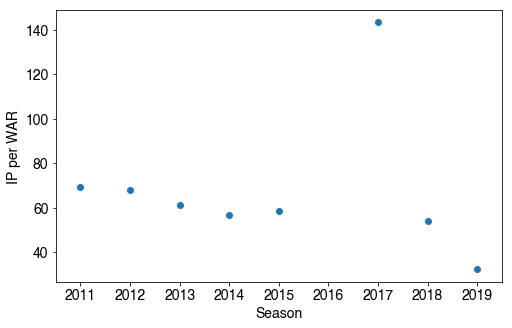

In [19]:
fig = plt.figure(figsize=(8,5))
(stats_df['corrected_IP']/stats_df['WAR']).plot(marker='o',linestyle='none')
plt.xlim(2010.5, 2019.5)
plt.xlabel("Season",fontsize=14)
plt.ylabel("IP per WAR", fontsize=14)
plt.gca().tick_params(axis='both', which='major', labelsize=14)
plt.savefig('../plots/lynn/ip_per_war')

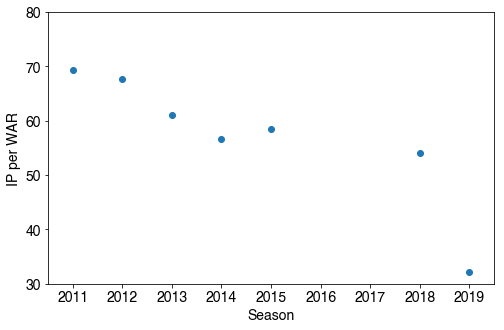

In [20]:
fig = plt.figure(figsize=(8,5))
(stats_df['corrected_IP']/stats_df['WAR']).plot(marker='o',linestyle='none')
plt.xlim(2010.5, 2019.5)
plt.ylim(30,80)
plt.xlabel("Season",fontsize=14)
plt.ylabel("IP per WAR", fontsize=14)
plt.gca().tick_params(axis='both', which='major', labelsize=14)
#plt.savefig('../plots/lynn/lynn_ip_per_war_small')

In [21]:
pre2019 = stats_df[~stats_df.index.isin([2019,2017,2016])]

In [22]:
pre2019 = pre2019.reset_index()
pre2019 = pre2019.reset_index()

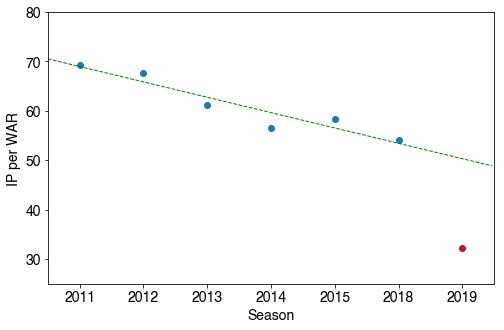

In [44]:
fig = plt.figure(figsize=(8,5))

import scipy.stats
slope, intercept, r_value, p_value, std_err = \
 scipy.stats.linregress(x=pre2019.index,y=pre2019['IP per WAR'])

pre2019['IP per WAR'].plot(marker='o', linestyle='none')

plt.xlim(0, 6.5)
valid_years = [str(x) for x in list(range(2011,2020)) if x not in [2017,2016]]
locs, labels = plt.xticks()
plt.xticks(ticks=locs,labels=valid_years)
plt.xlim(-0.5, 6.5)

plt.ylim(25,80)

xlims = plt.xlim()
new_x = np.arange(xlims[0], xlims[1],(xlims[1]-xlims[0])/250.)
plt.gca().plot(new_x, intercept + slope *  new_x, color='g', linestyle='--', lw = 1)
plt.xlabel("Season",fontsize=14)
plt.ylabel("IP per WAR", fontsize=14)
plt.gca().tick_params(axis='both', which='major', labelsize=14)

#fig = plt.figure(figsize=(8,5))
#sns.regplot(x='index',y='IP per WAR', data=pre2019)
plt.plot(6,stats_df['IP per WAR'][2019], marker='o',color='firebrick')
plt.savefig('../plots/lynn/lynn_ip_per_war_regression')